In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

# Zad
Na danych datasets wykonaj wykonaj LinearRegression w następujących krokach:

* podział na train test
* wykonaj skalowanie
* wykonaj PCA i wyznacz optymalną ilość komponentów
* naucz model
    * Naucz model na wszystkich współrzędnych 
    * Naucz model na zredukowanej ilości współrzędnych
    * porównaj wyniki


In [6]:
boston = datasets.load_boston()
# print description
# print(boston.DESCR)

In [7]:
X = boston.data
y = boston.target
print(X.shape)

(506, 13)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
# X_train.shape
# X_test.shape
# y_test.shape

In [22]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=5)

In [25]:
# preprocessing using 0-1 scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr.fit(X_train_scaled, y_train)

from sklearn import  metrics
# scoring on the scaled test set
print("Scaled test set R2: {:.2f}".format( metrics.r2_score( y_pred = lr.predict(X_test_scaled),y_true = y_test)) )
gl_r2 = metrics.r2_score( y_pred = lr.predict(X_test_scaled),y_true = y_test)

Scaled test set R2: 0.73


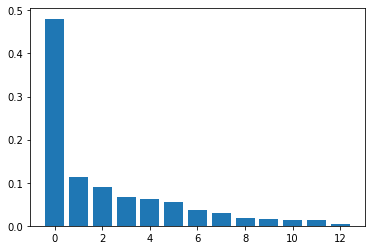

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled)
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

Scaled test set R2: 0.55


# Zad

Wykonaj powyższe zadanie z wykorzystaniem 

```python 
from sklearn.pipeline import Pipeline
```

Scaled test set R2: 0.55


# Zad

Narysuj zależność ilości wymiarów i miary R2.

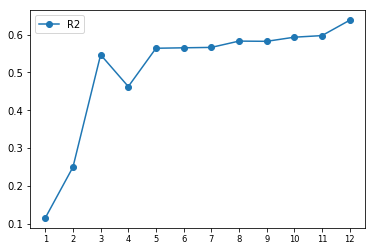

# Zad
Wykonaj GridSearch po ilości komponentów do której redukujesz wymiar do redukcji.
Sprawdź
```python
n_components = [2,3,4,5,6,7,8,9,10]
```

In [121]:
from sklearn.model_selection import GridSearchCV


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), None], 'pca__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameters:  {'pca__n_components': 13, 'scaler': None}
Best test R2: 0.64
